[[ 0.2441635  -0.48695527]
 [ 1.14514388 -0.48695527]
 [-0.80698027  2.94693621]
 [ 0.69465369 -0.48695527]
 [-0.95714367 -0.48695527]
 [-0.50665348 -0.48695527]
 [-0.50665348 -0.37249222]
 [-0.95714367 -0.48695527]
 [-0.65681688 -0.48695527]
 [ 1.89596087 -0.25802917]
 [ 0.5444903  -0.37249222]
 [-0.50665348 -0.37249222]
 [ 0.2441635  -0.25802917]
 [ 0.09400011  0.88660132]
 [-0.65681688 -0.48695527]
 [ 0.5444903  -0.48695527]
 [-0.20632669 -0.02910307]
 [-0.35649008 -0.48695527]
 [-0.05616329  0.31428608]
 [ 1.89596087 -0.48695527]
 [-1.10730707 -0.48695527]
 [-0.20632669  1.80230572]
 [-0.80698027 -0.48695527]
 [-0.20632669 -0.48695527]
 [-0.95714367 -0.48695527]
 [ 2.94710464 -0.48695527]
 [ 0.5444903  -0.48695527]
 [ 0.5444903  -0.48695527]
 [-0.05616329 -0.14356612]
 [-0.50665348 -0.48695527]
 [-0.35649008 -0.48695527]
 [-0.20632669  0.65767522]
 [ 0.2441635   2.94693621]
 [-0.20632669  1.80230572]
 [-0.95714367  1.22999047]
 [-1.25747046 -0.25802917]
 [-1.10730707 -0.48695527]
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


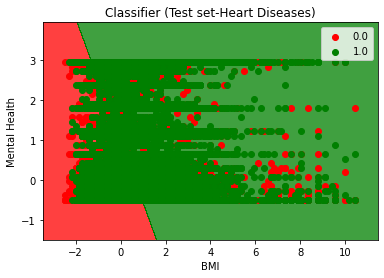

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv('C:/Users/asus/Desktop/my patents/pupil vs wmc project/diabetes_012_health_indicators_BRFSS2015.csv')
# input
dataset['Diabetes_012'].replace(to_replace = 2, value =1)

x = dataset.iloc[:,[4,16]].values


# output
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.8, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)




 
print (xtrain[0:100, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)



y_pred = classifier.predict(xtest)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set-Heart Diseases)')
plt.xlabel('BMI')
plt.ylabel('Mental Health')
plt.legend()
plt.show()




